# Mean Squared Error vs Cross Entropy 

In [113]:
%pylab inline
import numpy as np
import tensorflow as tf
import pandas as pd

from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['entropy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Create Interactive Session

In [3]:
init_op = tf.global_variables_initializer()

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.001, allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(init_op)

# Linear Regression Data

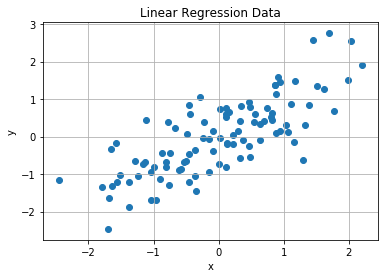

In [13]:
data = np.genfromtxt('../../data/linear-regression/linear-regression.csv', delimiter=',')

# Scaling
scaler = StandardScaler()
data = scaler.fit_transform(data)

x = data[:, 0]
y = data[:, 1] 
scatter(x, y)
grid()
xlabel('x')
ylabel('y')
title('Linear Regression Data')

In [14]:
def next_batch(x, y, size=10):
    N = x.shape[0]
    idx = np.random.randint(0, N-size)
    return x[idx: idx+size], y[idx: idx+size]

sample_x, sample_y = next_batch(x, y)
print(sample_x.shape, sample_y.shape)

(10,) (10,)


# Regression Model

In [246]:
def mean_squared_error(targets, preds):
    return tf.reduce_mean((targets - preds)**2)

def sigmoid_cross_entropy(targets, preds):
    """
    위의 prediction에서 음수도 나올수 있는데.. 이때 음수를 log에 넣으면 nan이 떠버립니다.
    따라서 sigmoid를 통해서 0~1사이의 값으로 보정을 해줍니다. 
    """
    preds = tf.sigmoid(preds)
    loss = -tf.reduce_sum(targets * tf.log(preds))
    return loss

def sigmmmoid_cross_entropy2(targets, preds):
    return tf.nn.sigmoid_cross_entropy_with_logits(logits=preds, labels=targets)
    
# Select Cost FUnction
cost_function = mean_squared_error


# Create Linear Regression Model
input_x = tf.placeholder('float', name='input_x')
input_y = tf.placeholder('float', name='input_y')

w = tf.Variable([-0.85918599], name='weights') # [-0.4775362]
b = tf.Variable(tf.zeros([1]), name='bias') # [ 0.]

pred = tf.add(tf.multiply(input_x, w), b, name='prediction')
cost = cost_function(input_y, pred)
grad = tf.train.MomentumOptimizer(learning_rate=0.05, momentum=0.5).minimize(cost)

init_op = tf.global_variables_initializer()
sess.run(init_op)

In [26]:
sess.run(w, feed_dict={input_x: x, input_y: y})

array([-0.85918599], dtype=float32)

### Linear Regression with Cross Entropy

특히 log를 사용하는 cross entropy의 경우에는 classification 문제가 아닌 regression문제에서는 다음과 같은 오류가 날 수 있습니다.

weights: 1.1393 | bias: 0.7323 | loss: -30.2798 | sum of predicts: 73.2280
weights: 3.6125 | bias: 0.2736 | loss: -127.3338 | sum of predicts: 27.3585
weights: 6.6962 | bias: -1.3908 | loss: -292.8667 | sum of predicts: -139.0764
weights: 10.1262 | bias: -3.7346 | loss: -493.0262 | sum of predicts: -373.4622
weights: 13.7379 | bias: -6.3939 | loss: -708.7568 | sum of predicts: -639.3861
weights: 17.4506 | bias: -9.1841 | loss: -931.6041 | sum of predicts: -918.4137
weights: 21.2247 | bias: -12.0167 | loss: -1157.6157 | sum of predicts: -1201.6697
weights: 25.0390 | bias: -14.8519 | loss: -1384.9764 | sum of predicts: -1485.1854
weights: 28.8802 | bias: -17.6755 | loss: -inf | sum of predicts: -1767.5458
weights: nan | bias: nan | loss: nan | sum of predicts: nan


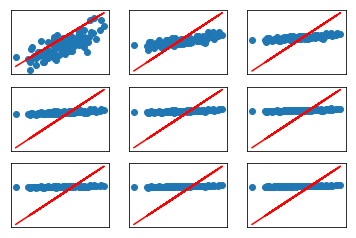

In [244]:
def run(verbose=True, n_iter=10):
    normal_y_pred = None
    for i in range(1, n_iter):
        
        sess.run(grad, feed_dict={input_x: x, input_y: y})
        y_pred, loss, _w, _b = sess.run([pred, cost, w, b], feed_dict={input_x: x, input_y: y})

        if verbose:
            _w, _b = _w[0], _b[0]
            _sum_pred = np.sum(y_pred)
            print(f'weights: {_w:.4f} | bias: {_b:.4f} | loss: {loss:.4f} | sum of predicts: {_sum_pred:.4f}')

        if np.isnan(y_pred).any():
            break
            
        axes = subplot(3, 3, i)
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)

        scatter(x, y)
        plot(x, y_pred, color='red')
        grid()
        axes.grid()
        
run(n_iter=20)

### Linear Regression with Mean Squared Error

반면에 Mean Squared Error의 경우에는 Regression에서 문제없이 처리를 잘 해냅니다.

weights: -0.6959 | bias: 0.0000 | loss: 2.5611 | sum of predicts: 0.0000
weights: -0.4673 | bias: -0.0000 | loss: 1.9415 | sum of predicts: 0.0000
weights: -0.2289 | bias: -0.0000 | loss: 1.4066 | sum of predicts: 0.0000
weights: -0.0094 | bias: -0.0000 | loss: 1.0147 | sum of predicts: -0.0000
weights: 0.1786 | bias: -0.0000 | loss: 0.7555 | sum of predicts: -0.0000
weights: 0.3322 | bias: -0.0000 | loss: 0.5963 | sum of predicts: 0.0000
weights: 0.4531 | bias: -0.0000 | loss: 0.5042 | sum of predicts: -0.0000
weights: 0.5456 | bias: -0.0000 | loss: 0.4534 | sum of predicts: 0.0000
weights: 0.6147 | bias: -0.0000 | loss: 0.4266 | sum of predicts: 0.0000


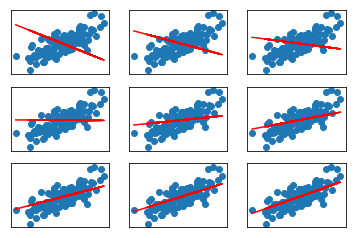

In [247]:
run(verbose=True)